<a href="https://colab.research.google.com/github/sabiha0613/64061_smhatarn/blob/main/AML_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advance Machine Learning

## Assignment #1 (Neural Networks)
### Submitted By: Sabiha Mhatarnaik

In this assignment, we will accomplish the following:
1. Modify an existing neural network model to improve performance
2. Explain how different approaches affect the performance of the model

In [ ]:
#@title Import Keras
import keras
keras.__version__

'2.4.3'

## The IMDB dataset


We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

The following code will load the dataset:

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 


The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000.

## Preparing the data


We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

* We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape `(samples, word_indices)`, 
then use as first layer in our network a layer capable of handling such integer tensors (the `Embedding` layer, which we will cover in 
detail later in the book).
* We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence 
`[3, 5]` into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as 
first layer in our network a `Dense` layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize our labels:

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

## Building our network


Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of 
network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16, 
activation='relu')`

Lastly, we need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network 
is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy` loss. 




In [ ]:
import tensorflow as tf
from keras import models
from keras import layers

tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Validating our approach

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by 
setting apart 10,000 samples from the original training data:

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors), in mini-batches of 512 
samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the 
validation data as the `validation_data` argument:

In [ ]:
tf.random.set_seed(1234)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5750 - accuracy: 0.7227 - val_loss: 0.3850 - val_accuracy: 0.8568
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2999 - accuracy: 0.9109 - val_loss: 0.3061 - val_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2178 - accuracy: 0.9277 - val_loss: 0.2844 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1692 - accuracy: 0.9505 - val_loss: 0.2800 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1345 - accuracy: 0.9607 - val_loss: 0.2846 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1065 - accuracy: 0.9702 - val_loss: 0.3003 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0865 - accuracy: 0.9777 - val_loss: 0.3135 - val_accuracy: 0.8833
Epoch 8/20
30

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data 
about everything that happened during training. Let's take a look at it:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the 
training and validation loss side by side, as well as the training and validation accuracy:

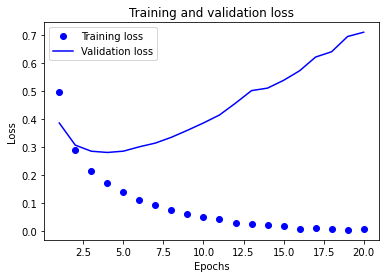

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

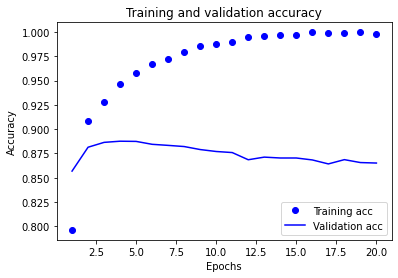

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy. 

In this case, to prevent overfitting, we could simply stop training after three epochs. 

Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.5351 - accuracy: 0.7480
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2628 - accuracy: 0.9119
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1972 - accuracy: 0.9317
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3011 - accuracy: 0.8802


In [ ]:
results

[0.30110737681388855, 0.8801599740982056]

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

In [ ]:
history_dict = history1.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

## Using a trained network to generate predictions on new data

After having trained a network, we will want to use it in a practical setting. We can generate the likelihood of reviews being positive 
by using the `predict` method:

In [ ]:
model.predict(x_test)

array([[0.13726395],
       [0.99964595],
       [0.911191  ],
       ...,
       [0.12269214],
       [0.05598974],
       [0.3942118 ]], dtype=float32)

As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4). 


## Further experiments


* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.
* Try to use any technique studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

These experiments will help convince us that the architecture choices we have made are all fairly reasonable, although they can still be 
improved!

### Different Hidden Layers

#### Single Hidden Layer

In [ ]:

tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5703 - accuracy: 0.7367 - val_loss: 0.3982 - val_accuracy: 0.8645
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3335 - accuracy: 0.9056 - val_loss: 0.3278 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2571 - accuracy: 0.9189 - val_loss: 0.2937 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2073 - accuracy: 0.9409 - val_loss: 0.2824 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1748 - accuracy: 0.9497 - val_loss: 0.2747 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1487 - accuracy: 0.9584 - val_loss: 0.2743 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1281 - accuracy: 0.9657 - val_loss: 0.2792 - val_accuracy: 0.8888
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

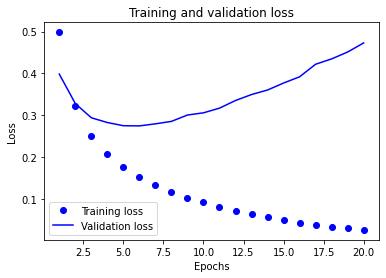

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

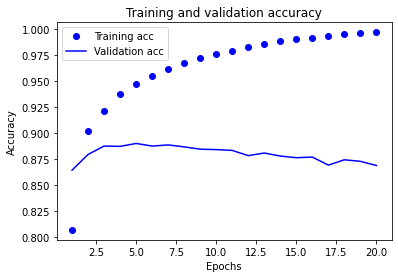

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As you can see, the less layers starts overfitting later than the reference one (after 6 epochs rather than 4). 
Now, lets use the 6 epochs 

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/6
49/49 [==============================] - 2s 22ms/step - loss: 0.5375 - accuracy: 0.7524
Epoch 2/6
49/49 [==============================] - 1s 21ms/step - loss: 0.2954 - accuracy: 0.9067
Epoch 3/6
49/49 [==============================] - 1s 21ms/step - loss: 0.2251 - accuracy: 0.9264
Epoch 4/6
49/49 [==============================] - 1s 21ms/step - loss: 0.1859 - accuracy: 0.9378
Epoch 5/6
49/49 [==============================] - 1s 21ms/step - loss: 0.1636 - accuracy: 0.9459
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.2948 - accuracy: 0.8840


In [ ]:
results

[0.29475972056388855, 0.8840399980545044]

#### Three Hidden Layers

In [ ]:
tf.random.set_seed(1234)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6086 - accuracy: 0.7077 - val_loss: 0.4188 - val_accuracy: 0.8491
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3443 - accuracy: 0.8990 - val_loss: 0.3135 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2380 - accuracy: 0.9260 - val_loss: 0.2822 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1777 - accuracy: 0.9464 - val_loss: 0.2776 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1396 - accuracy: 0.9584 - val_loss: 0.2846 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1097 - accuracy: 0.9689 - val_loss: 0.3040 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0884 - accuracy: 0.9752 - val_loss: 0.3210 - val_accuracy: 0.8836
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

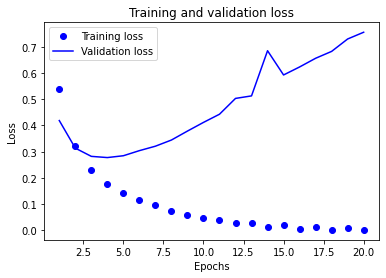

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

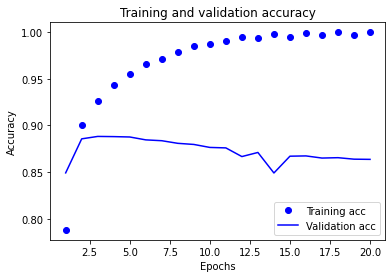

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


As we can see, the more layers starts overfitting at the reference one (epoch 4) Let's use 4 epochs

In [ ]:
tf.random.set_seed(1234)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.5852 - accuracy: 0.7220
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2884 - accuracy: 0.9051
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2062 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3032 - accuracy: 0.8810


In [ ]:
results

[0.30319130420684814, 0.8809599876403809]

####Comparison of Different Hiden Layers

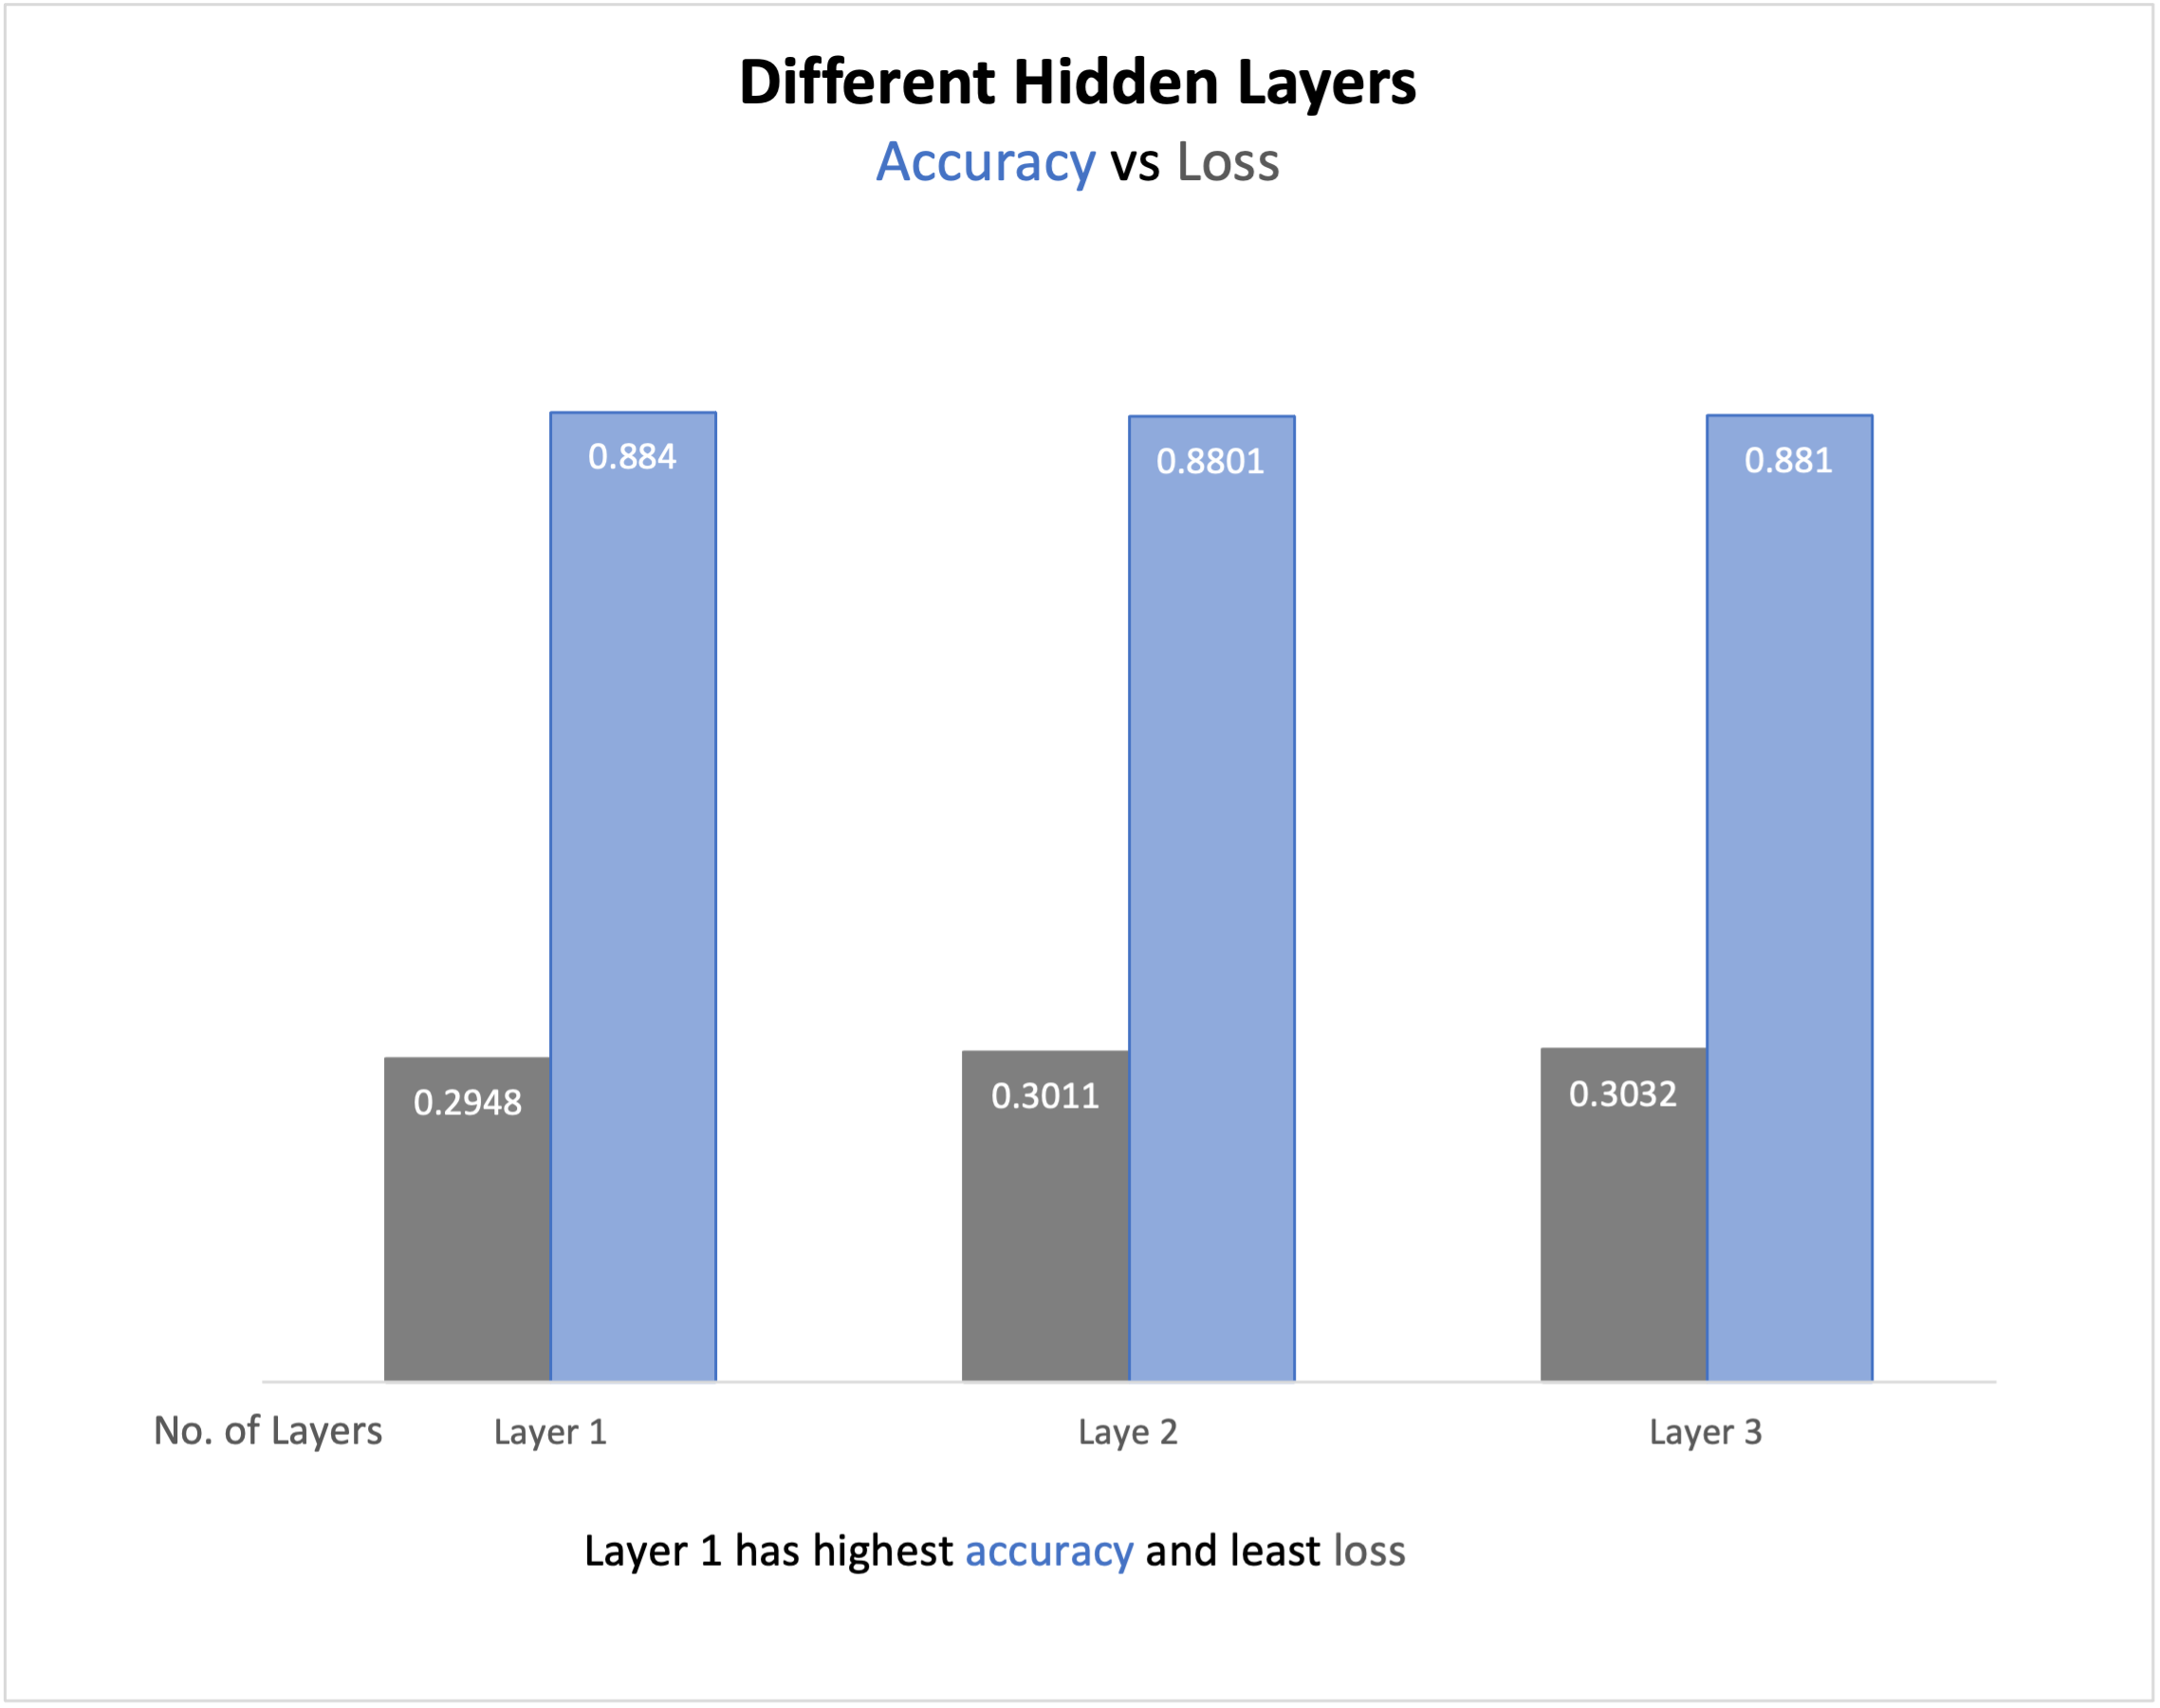

## More Units

####  32 Hidden units

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5559 - accuracy: 0.7220 - val_loss: 0.3523 - val_accuracy: 0.8650
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2652 - accuracy: 0.9149 - val_loss: 0.2800 - val_accuracy: 0.8927
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1977 - accuracy: 0.9310 - val_loss: 0.2938 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1436 - accuracy: 0.9543 - val_loss: 0.2881 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1104 - accuracy: 0.9651 - val_loss: 0.3042 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0871 - accuracy: 0.9721 - val_loss: 0.3341 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0675 - accuracy: 0.9819 - val_loss: 0.3557 - val_accuracy: 0.8778
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

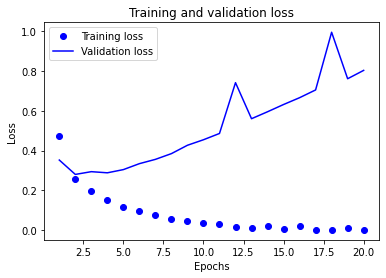

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

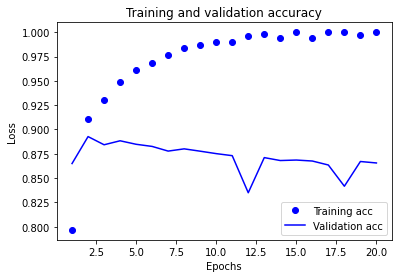

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

As we can see, when we add more units, the network starts overfitting at the reference one (Epochs 4) and its performance degrades much more slowly once it starts overfitting. Let's add 4 epochs

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.5413 - accuracy: 0.7229
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2515 - accuracy: 0.9105
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1865 - accuracy: 0.9358
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3267 - accuracy: 0.8754


In [ ]:
results

[0.3267498314380646, 0.8753600120544434]

#### 64 Hidden units

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5764 - accuracy: 0.7034 - val_loss: 0.3862 - val_accuracy: 0.8381
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2688 - accuracy: 0.9026 - val_loss: 0.2956 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1929 - accuracy: 0.9300 - val_loss: 0.2839 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1286 - accuracy: 0.9577 - val_loss: 0.3244 - val_accuracy: 0.8759
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0986 - accuracy: 0.9684 - val_loss: 0.3318 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.4516 - val_accuracy: 0.8612
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.0596 - accuracy: 0.9809 - val_loss: 0.3805 - val_accuracy: 0.8788
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

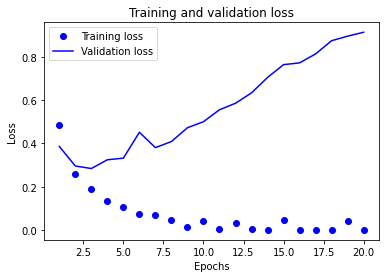

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


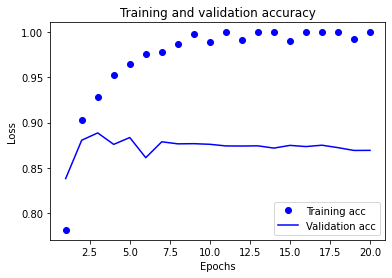

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


As we can see, when we add more and more units, the network starts overfitting earlier then the reference one (Epochs 3) and its performance degrades much more slowly once it starts overfitting. Let's add 3 epochs

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/3
49/49 [==============================] - 3s 56ms/step - loss: 0.5293 - accuracy: 0.7225
Epoch 2/3
49/49 [==============================] - 4s 90ms/step - loss: 0.2442 - accuracy: 0.9072
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3715 - accuracy: 0.8575


In [ ]:
results

[0.37148019671440125, 0.857479989528656]

#### 8 Units

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6142 - accuracy: 0.6838 - val_loss: 0.4299 - val_accuracy: 0.8445
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3605 - accuracy: 0.8977 - val_loss: 0.3381 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2662 - accuracy: 0.9211 - val_loss: 0.2965 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2099 - accuracy: 0.9412 - val_loss: 0.2839 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1728 - accuracy: 0.9495 - val_loss: 0.2739 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1429 - accuracy: 0.9601 - val_loss: 0.2755 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1188 - accuracy: 0.9691 - val_loss: 0.2820 - val_accuracy: 0.8878
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

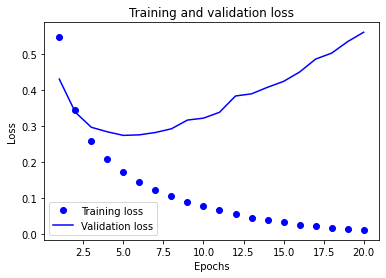

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


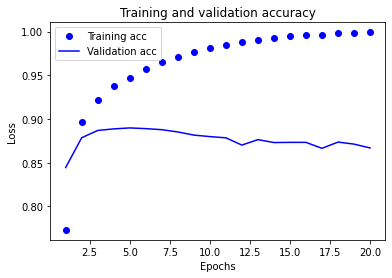

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



As we can see, when we add more units, the network starts overfitting higher than the reference one (Epochs 6) and its performance degrades much more slowly once it starts overfitting. Let's add 6 epochs

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/6
49/49 [==============================] - 2s 26ms/step - loss: 0.5604 - accuracy: 0.7296
Epoch 2/6
49/49 [==============================] - 1s 30ms/step - loss: 0.2963 - accuracy: 0.9054
Epoch 3/6
49/49 [==============================] - 1s 29ms/step - loss: 0.2201 - accuracy: 0.9269
Epoch 4/6
49/49 [==============================] - 1s 28ms/step - loss: 0.1783 - accuracy: 0.9417
Epoch 5/6
49/49 [==============================] - 1s 22ms/step - loss: 0.1531 - accuracy: 0.9497
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.3084 - accuracy: 0.8807


In [ ]:
results

####Comparison of multiple Units used

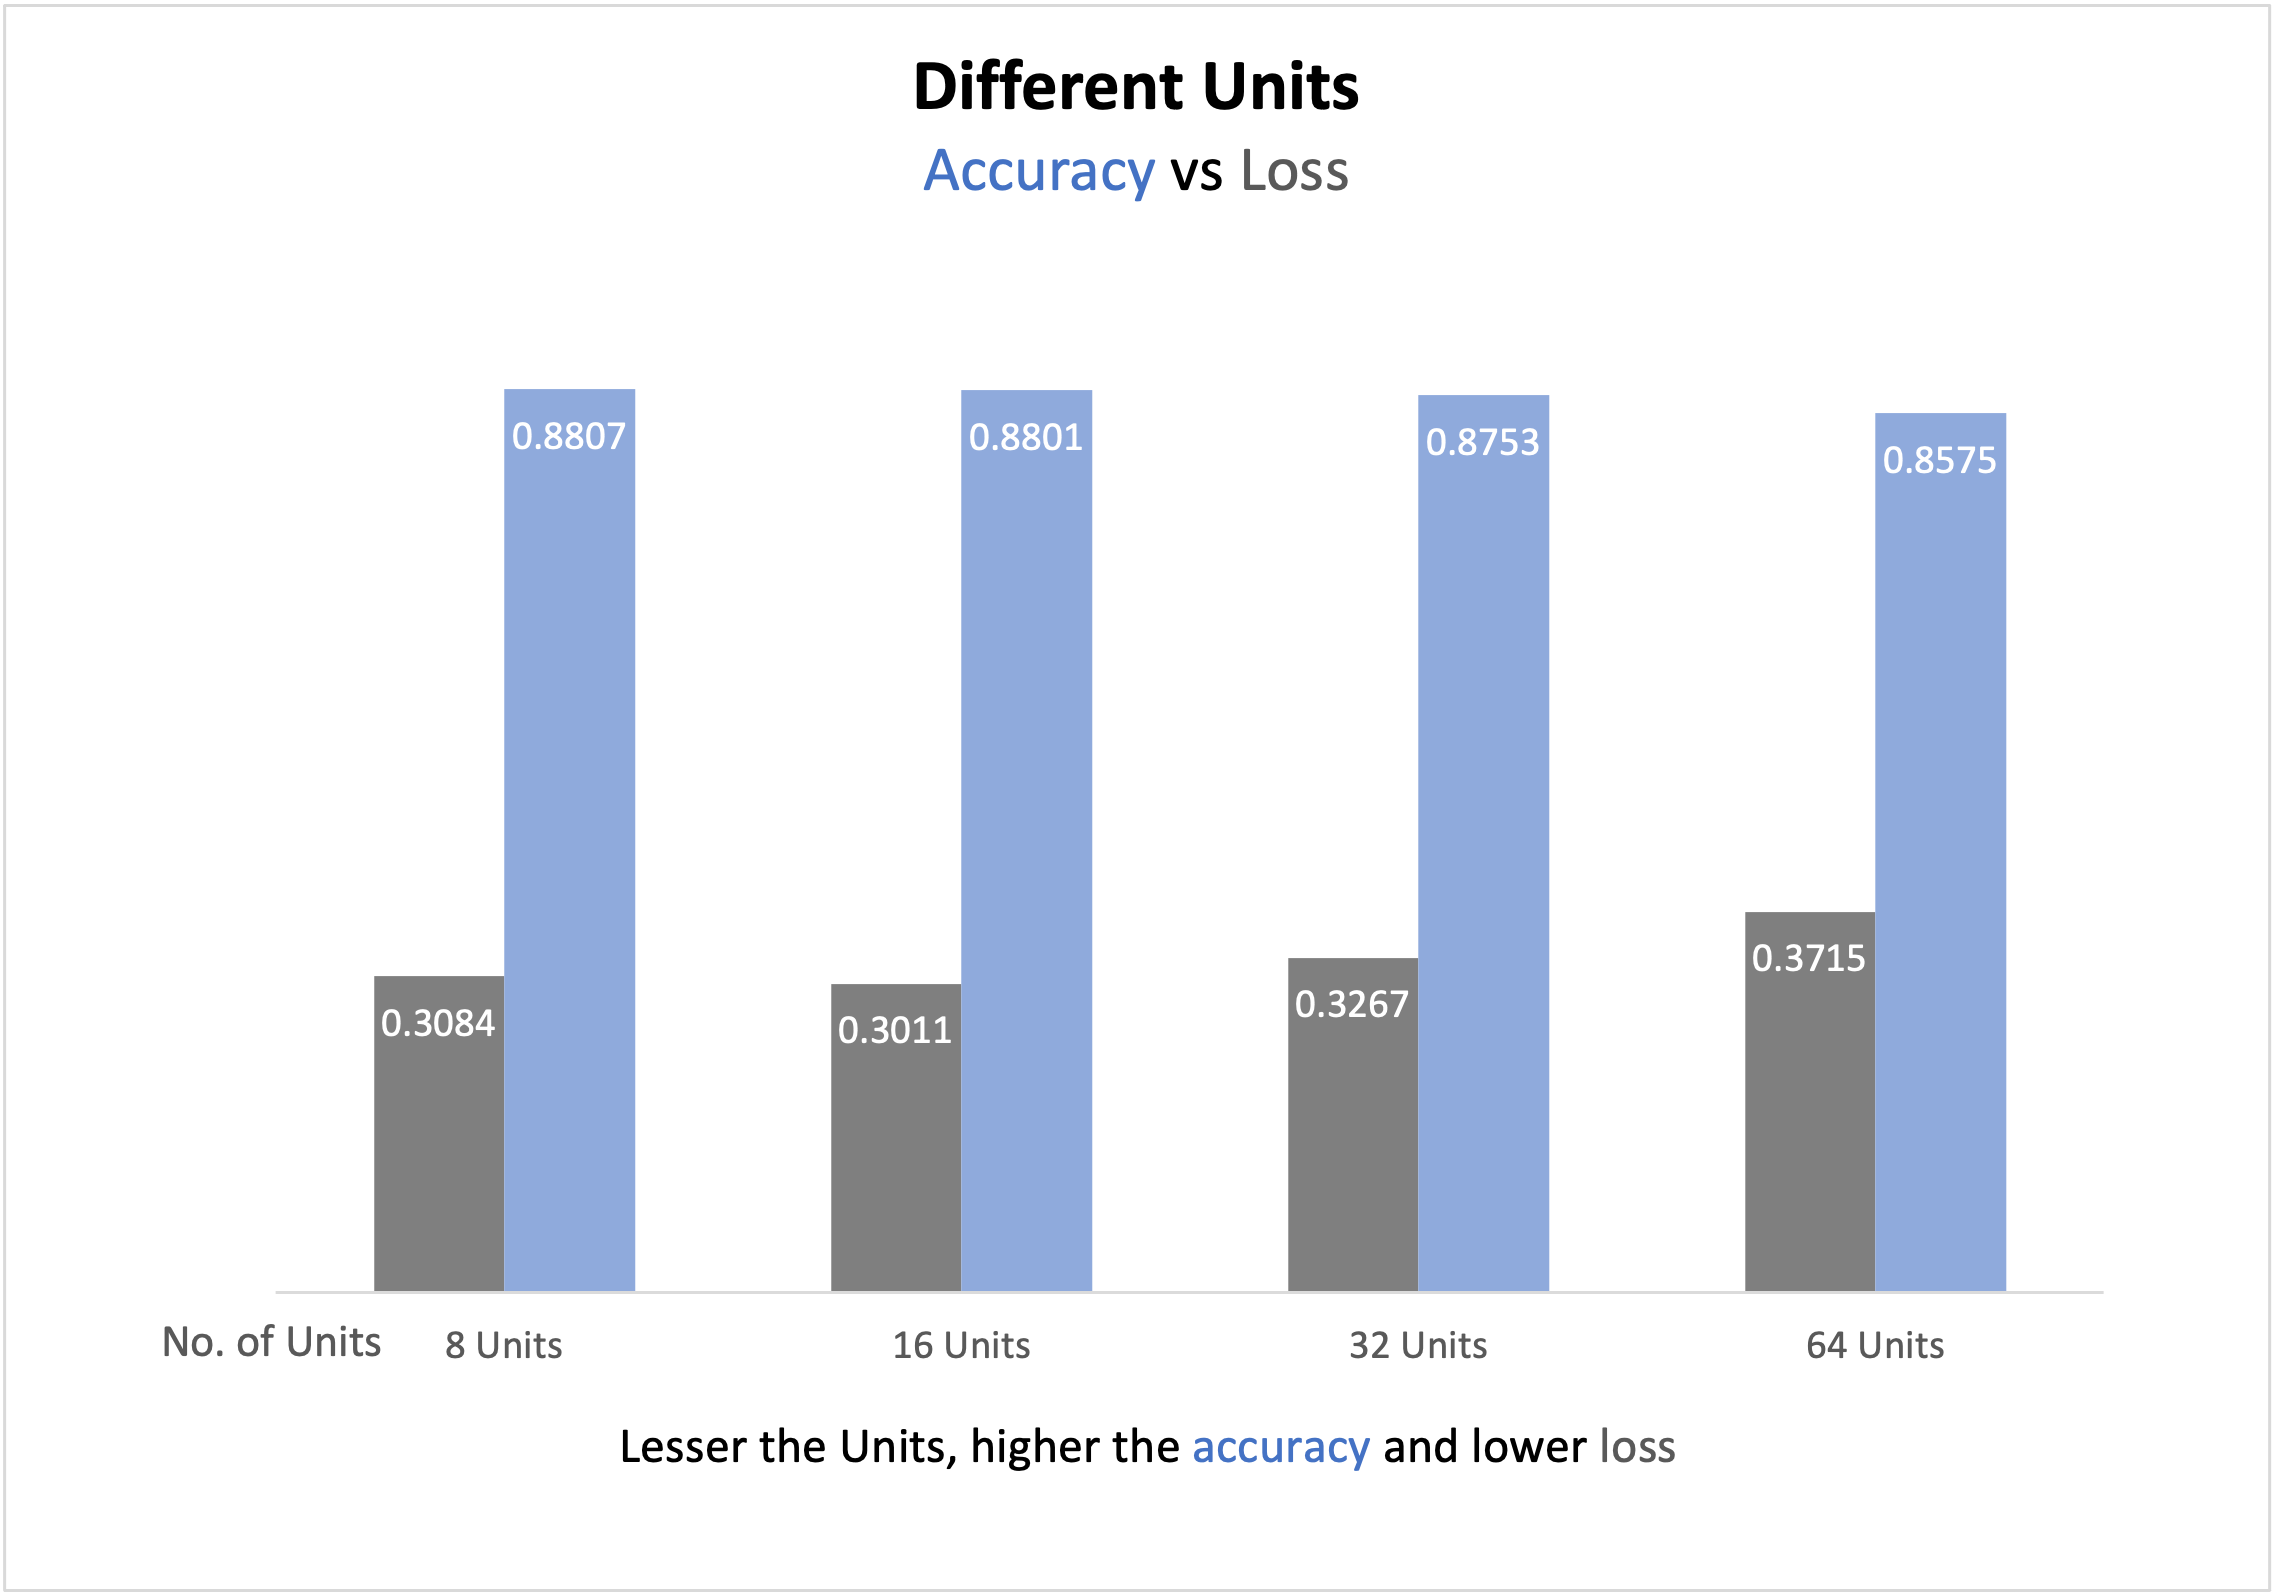

### MSE loss function

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.1963 - accuracy: 0.7224 - val_loss: 0.1111 - val_accuracy: 0.8767
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0868 - accuracy: 0.9173 - val_loss: 0.0932 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0658 - accuracy: 0.9279 - val_loss: 0.0849 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0464 - accuracy: 0.9535 - val_loss: 0.0827 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0380 - accuracy: 0.9632 - val_loss: 0.0832 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0301 - accuracy: 0.9714 - val_loss: 0.0858 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0245 - accuracy: 0.9788 - val_loss: 0.0870 - val_accuracy: 0.8822
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

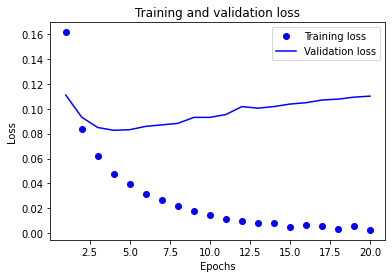

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


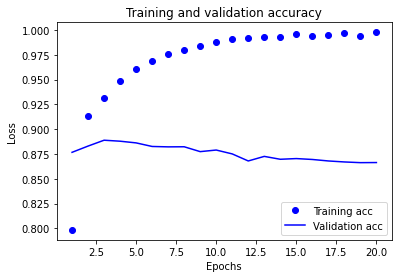

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


As we can see, when we use mse function, the network starts overfitting at the reference one (Epochs 4) and its performance degrades much more slowly once it starts overfitting. Let's add 4 epochs

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.1798 - accuracy: 0.7482
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0768 - accuracy: 0.9136
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.0570 - accuracy: 0.9336
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0907 - accuracy: 0.8772


In [ ]:
results

[0.0906618982553482, 0.8771600127220154]

####Comparison of MSE and Binarycrossentropy Functions

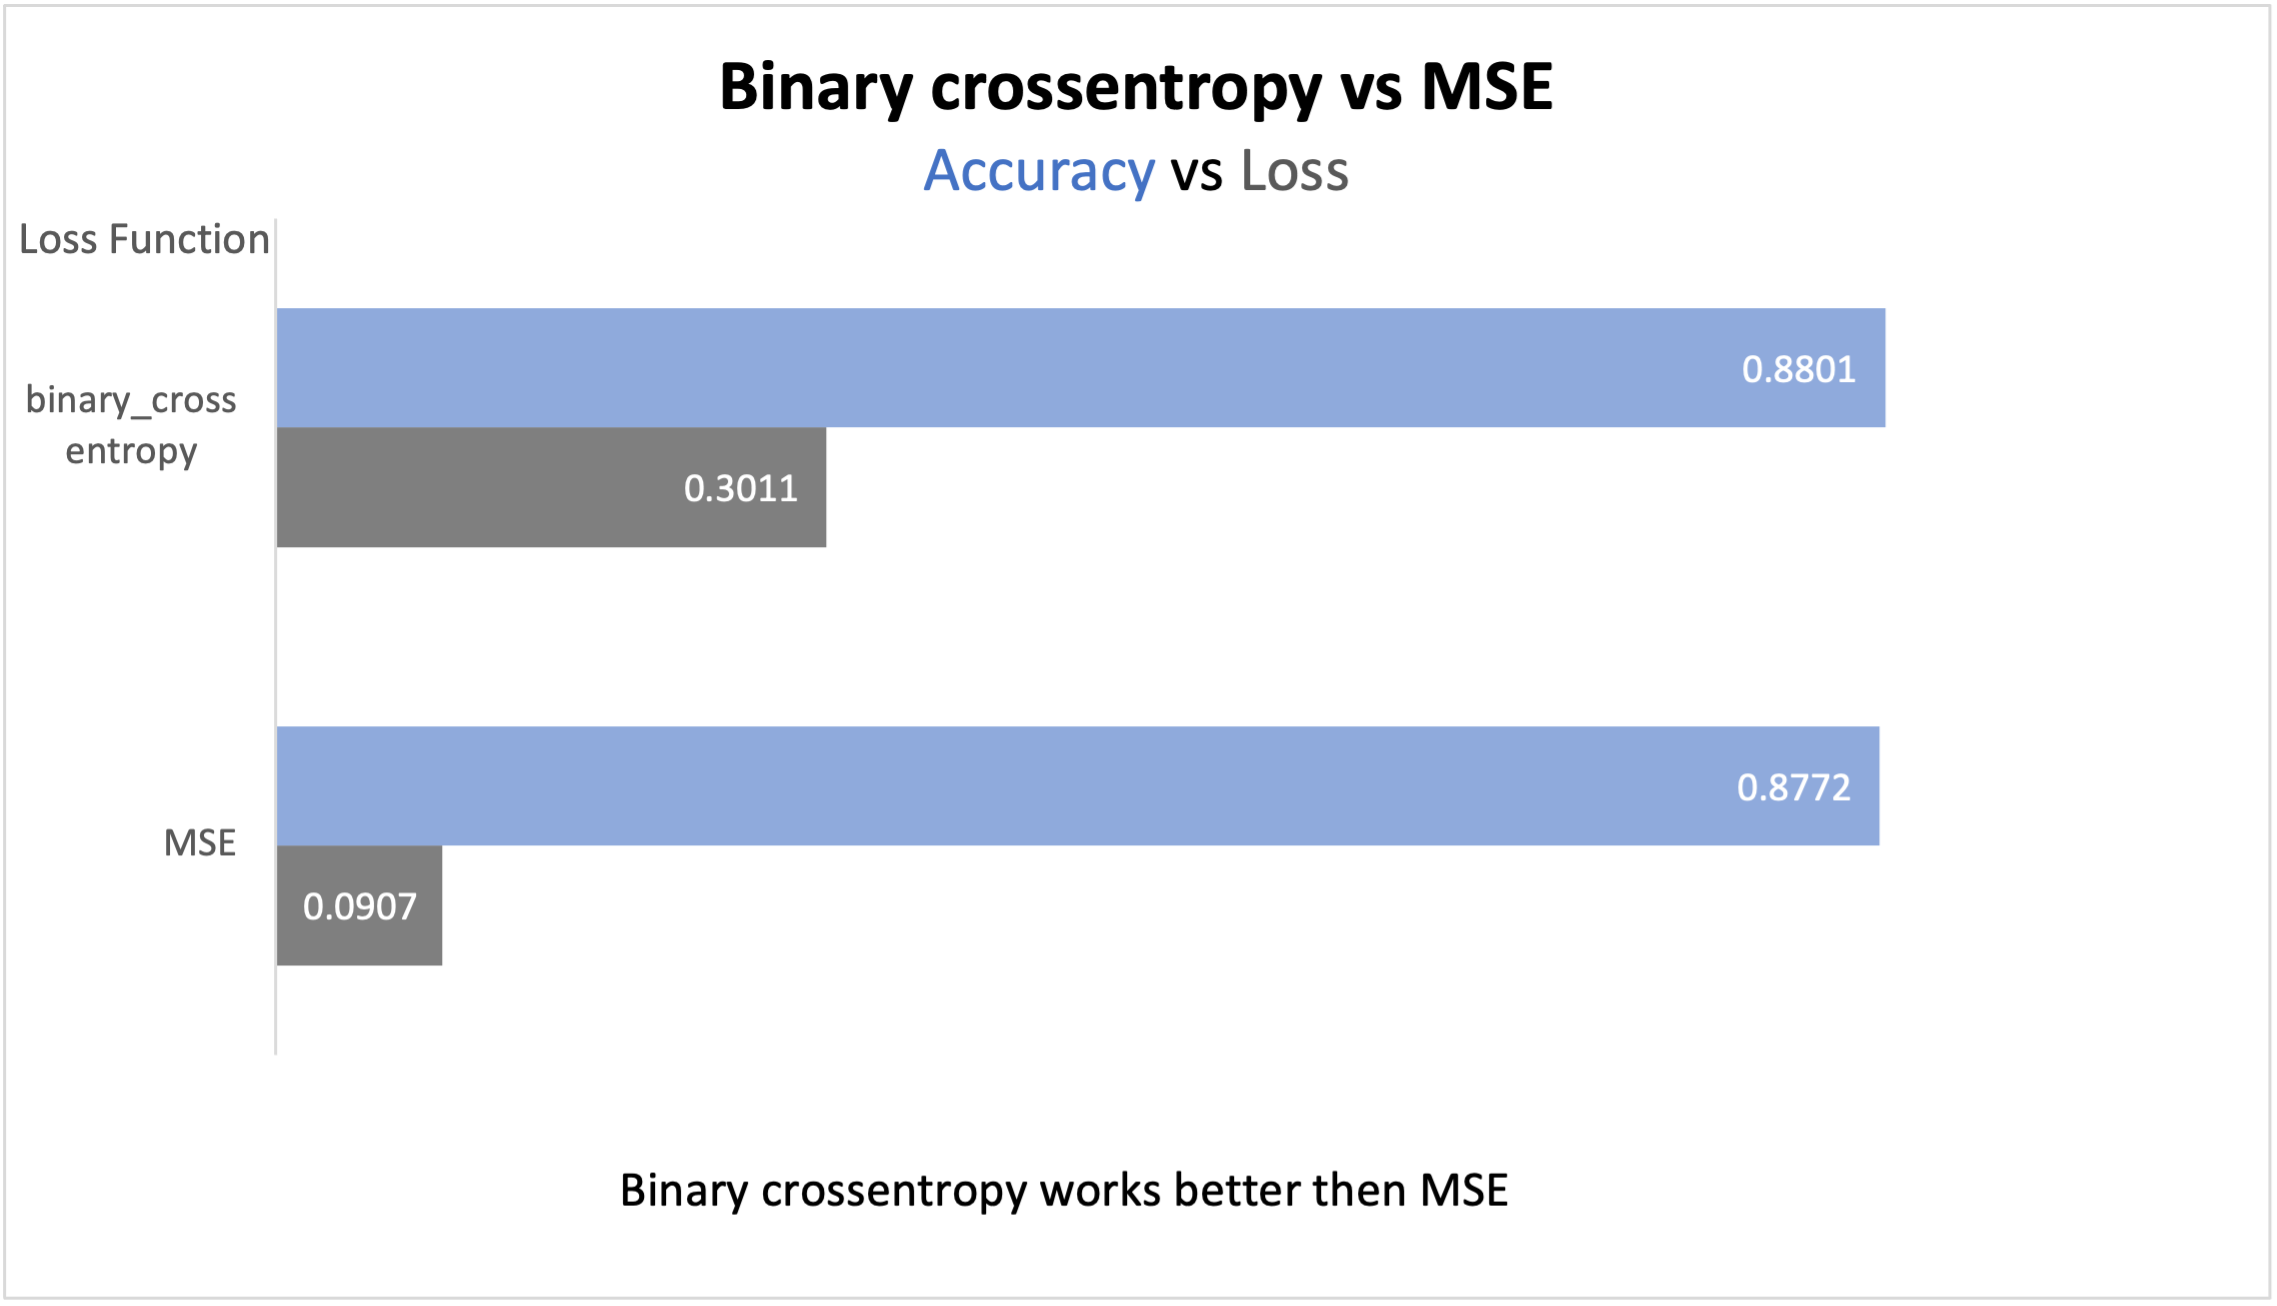

### Tanh activation 

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5524 - accuracy: 0.7234 - val_loss: 0.3569 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2725 - accuracy: 0.9168 - val_loss: 0.2836 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1935 - accuracy: 0.9331 - val_loss: 0.2741 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1403 - accuracy: 0.9561 - val_loss: 0.2971 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1109 - accuracy: 0.9659 - val_loss: 0.3118 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0787 - accuracy: 0.9757 - val_loss: 0.3632 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0612 - accuracy: 0.9822 - val_loss: 0.3803 - val_accuracy: 0.8774
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

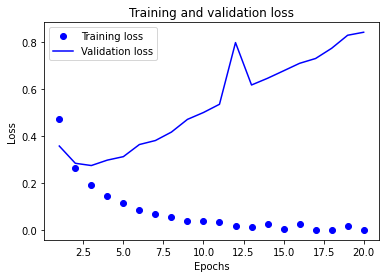

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


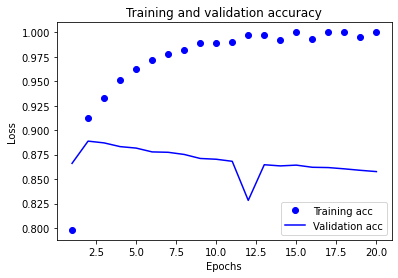

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


As we can see, when we add tanh activation, the network starts overfitting at lesser then reference one (Epochs 3) and its performance degrades much more slowly once it starts overfitting. Let's add 3 epochs


In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/3
49/49 [==============================] - 2s 21ms/step - loss: 0.5134 - accuracy: 0.7530
Epoch 2/3
49/49 [==============================] - 1s 22ms/step - loss: 0.2396 - accuracy: 0.9163
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2994 - accuracy: 0.8810


In [ ]:
results

[0.2994297742843628, 0.8810399770736694]

####Comparison of Tanh and Relu Activation Functions

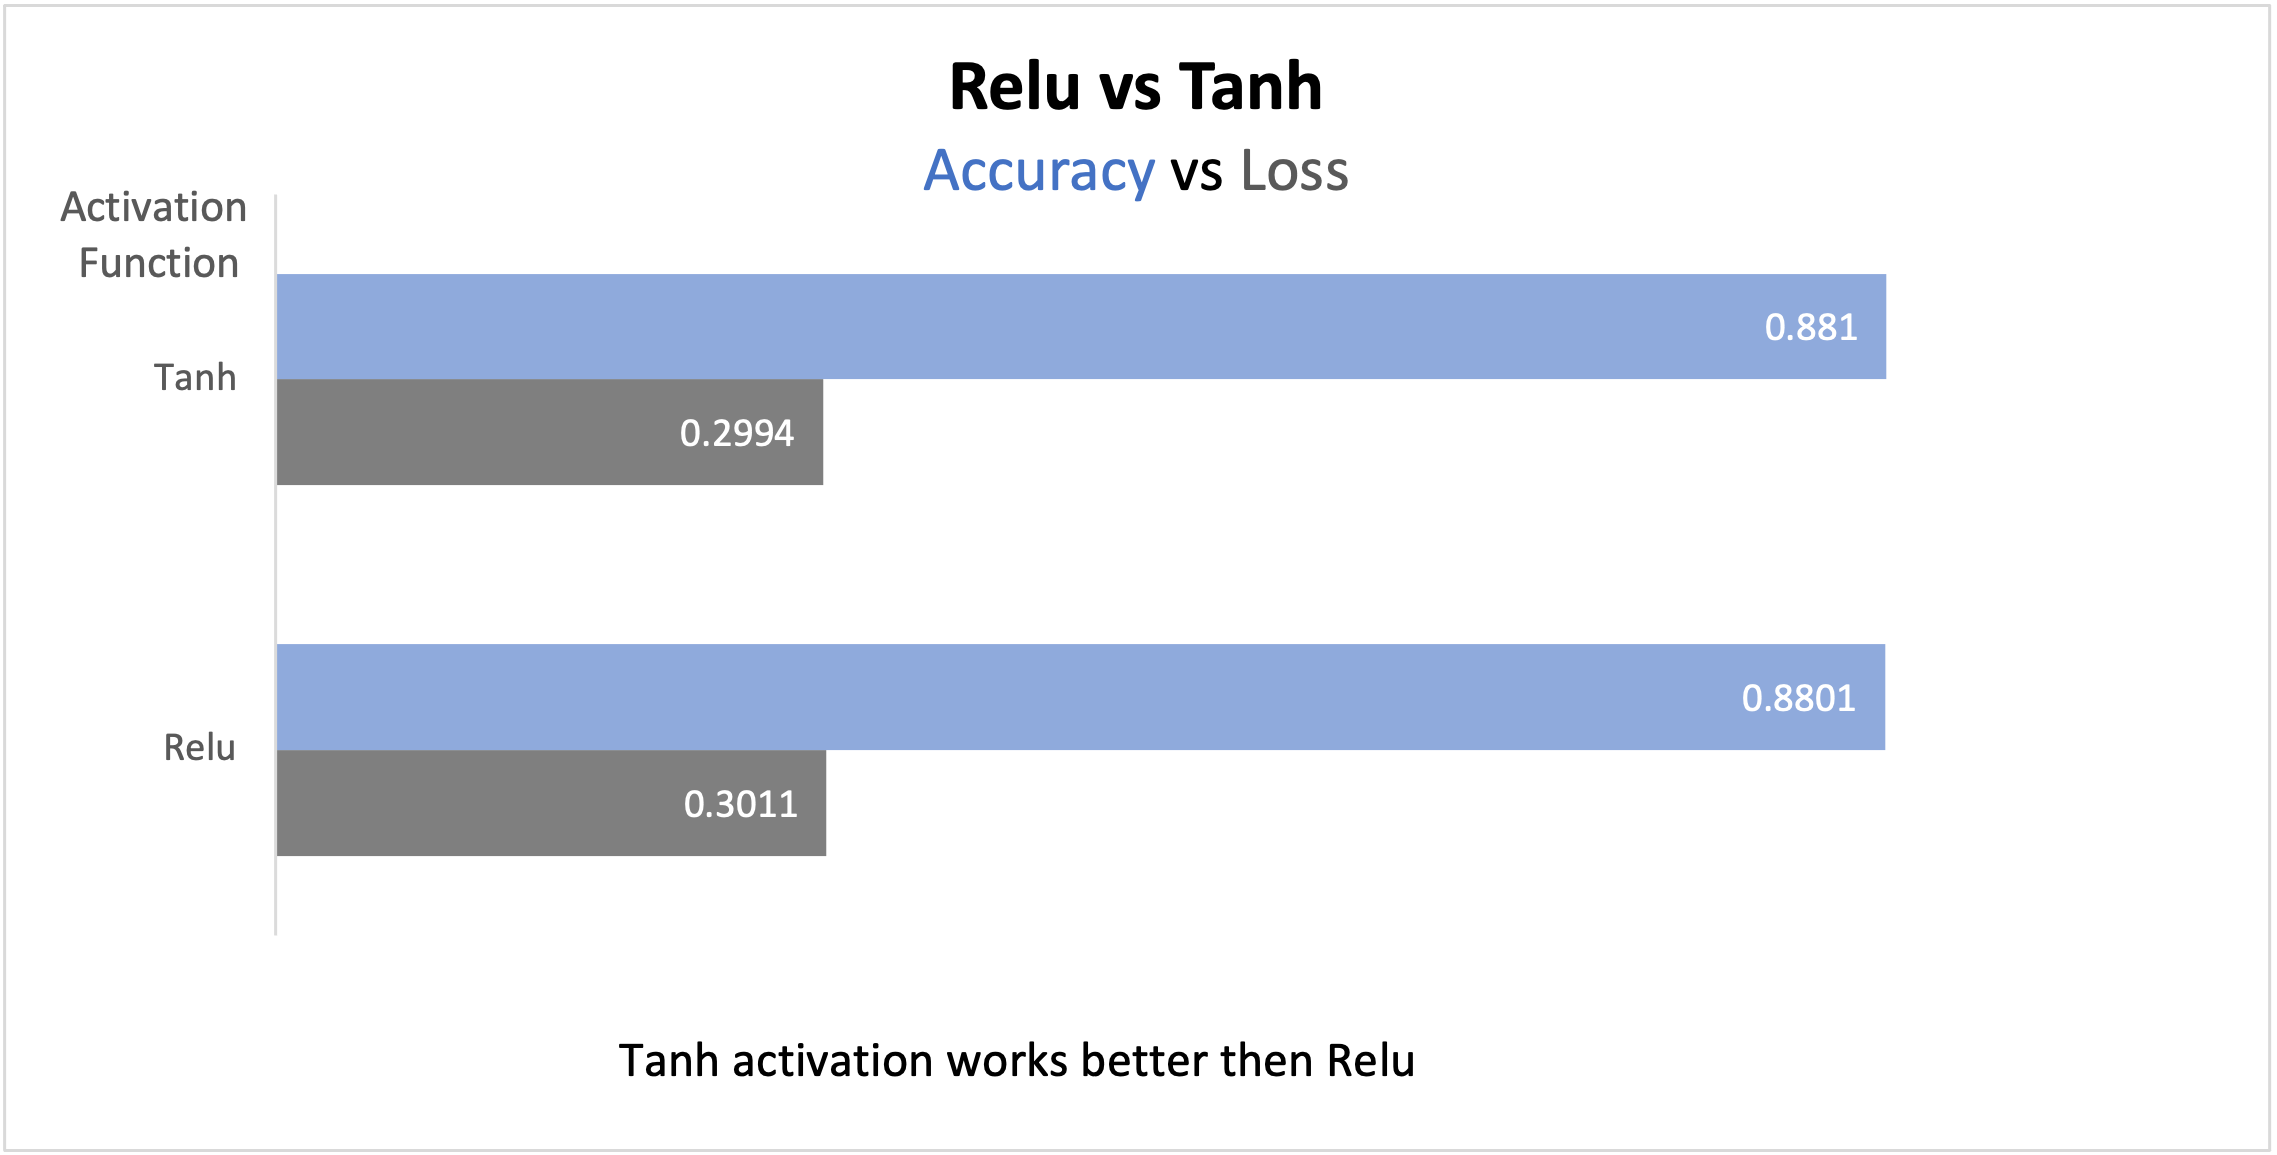

### Dropout Technique

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6510 - accuracy: 0.6060 - val_loss: 0.4950 - val_accuracy: 0.8478
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4961 - accuracy: 0.7774 - val_loss: 0.3797 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4059 - accuracy: 0.8289 - val_loss: 0.3226 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3390 - accuracy: 0.8699 - val_loss: 0.2968 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3000 - accuracy: 0.8929 - val_loss: 0.2872 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2519 - accuracy: 0.9130 - val_loss: 0.2774 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2217 - accuracy: 0.9255 - val_loss: 0.2785 - val_accuracy: 0.8885
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

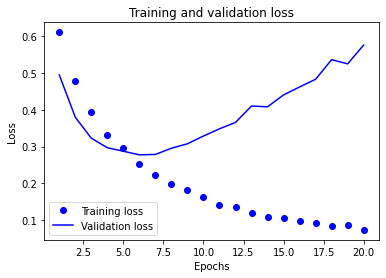

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


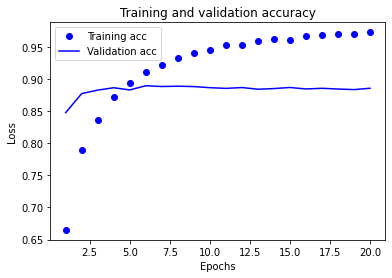

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


As we can see, when we add mdropout technique, the network starts overfitting at much higher than the reference one (Epochs 6) and its performance degrades much more slowly once it starts overfitting. Let's add 6 epochs

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/6
49/49 [==============================] - 2s 20ms/step - loss: 0.6268 - accuracy: 0.6354
Epoch 2/6
49/49 [==============================] - 1s 20ms/step - loss: 0.4365 - accuracy: 0.8161
Epoch 3/6
49/49 [==============================] - 1s 21ms/step - loss: 0.3445 - accuracy: 0.8662
Epoch 4/6
49/49 [==============================] - 1s 19ms/step - loss: 0.2853 - accuracy: 0.8959
Epoch 5/6
49/49 [==============================] - 1s 21ms/step - loss: 0.2457 - accuracy: 0.9139
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.2949 - accuracy: 0.8871


In [ ]:
results

[0.2949349284172058, 0.8870800137519836]

###Regularization

In [ ]:
from keras import regularizers

tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6186 - accuracy: 0.7221 - val_loss: 0.4300 - val_accuracy: 0.8566
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3523 - accuracy: 0.9093 - val_loss: 0.3577 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2806 - accuracy: 0.9228 - val_loss: 0.3419 - val_accuracy: 0.8822
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2425 - accuracy: 0.9420 - val_loss: 0.3296 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2170 - accuracy: 0.9496 - val_loss: 0.3345 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2007 - accuracy: 0.9551 - val_loss: 0.3403 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1884 - accuracy: 0.9612 - val_loss: 0.3470 - val_accuracy: 0.8853
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

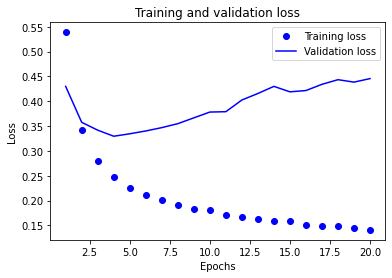

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


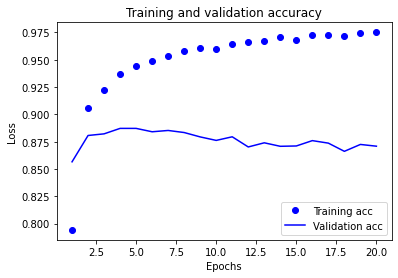

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


As we can see, when we regularization technique, the network starts overfitting at the reference one (Epochs 4) and its performance degrades much more slowly once it starts overfitting. Let's add 4 epochs

In [ ]:
tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.5727 - accuracy: 0.7543
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.3208 - accuracy: 0.9065
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2688 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3502 - accuracy: 0.8793


In [ ]:
results

[0.3501604199409485, 0.8792799711227417]

####Comparison of Regularization Techniques

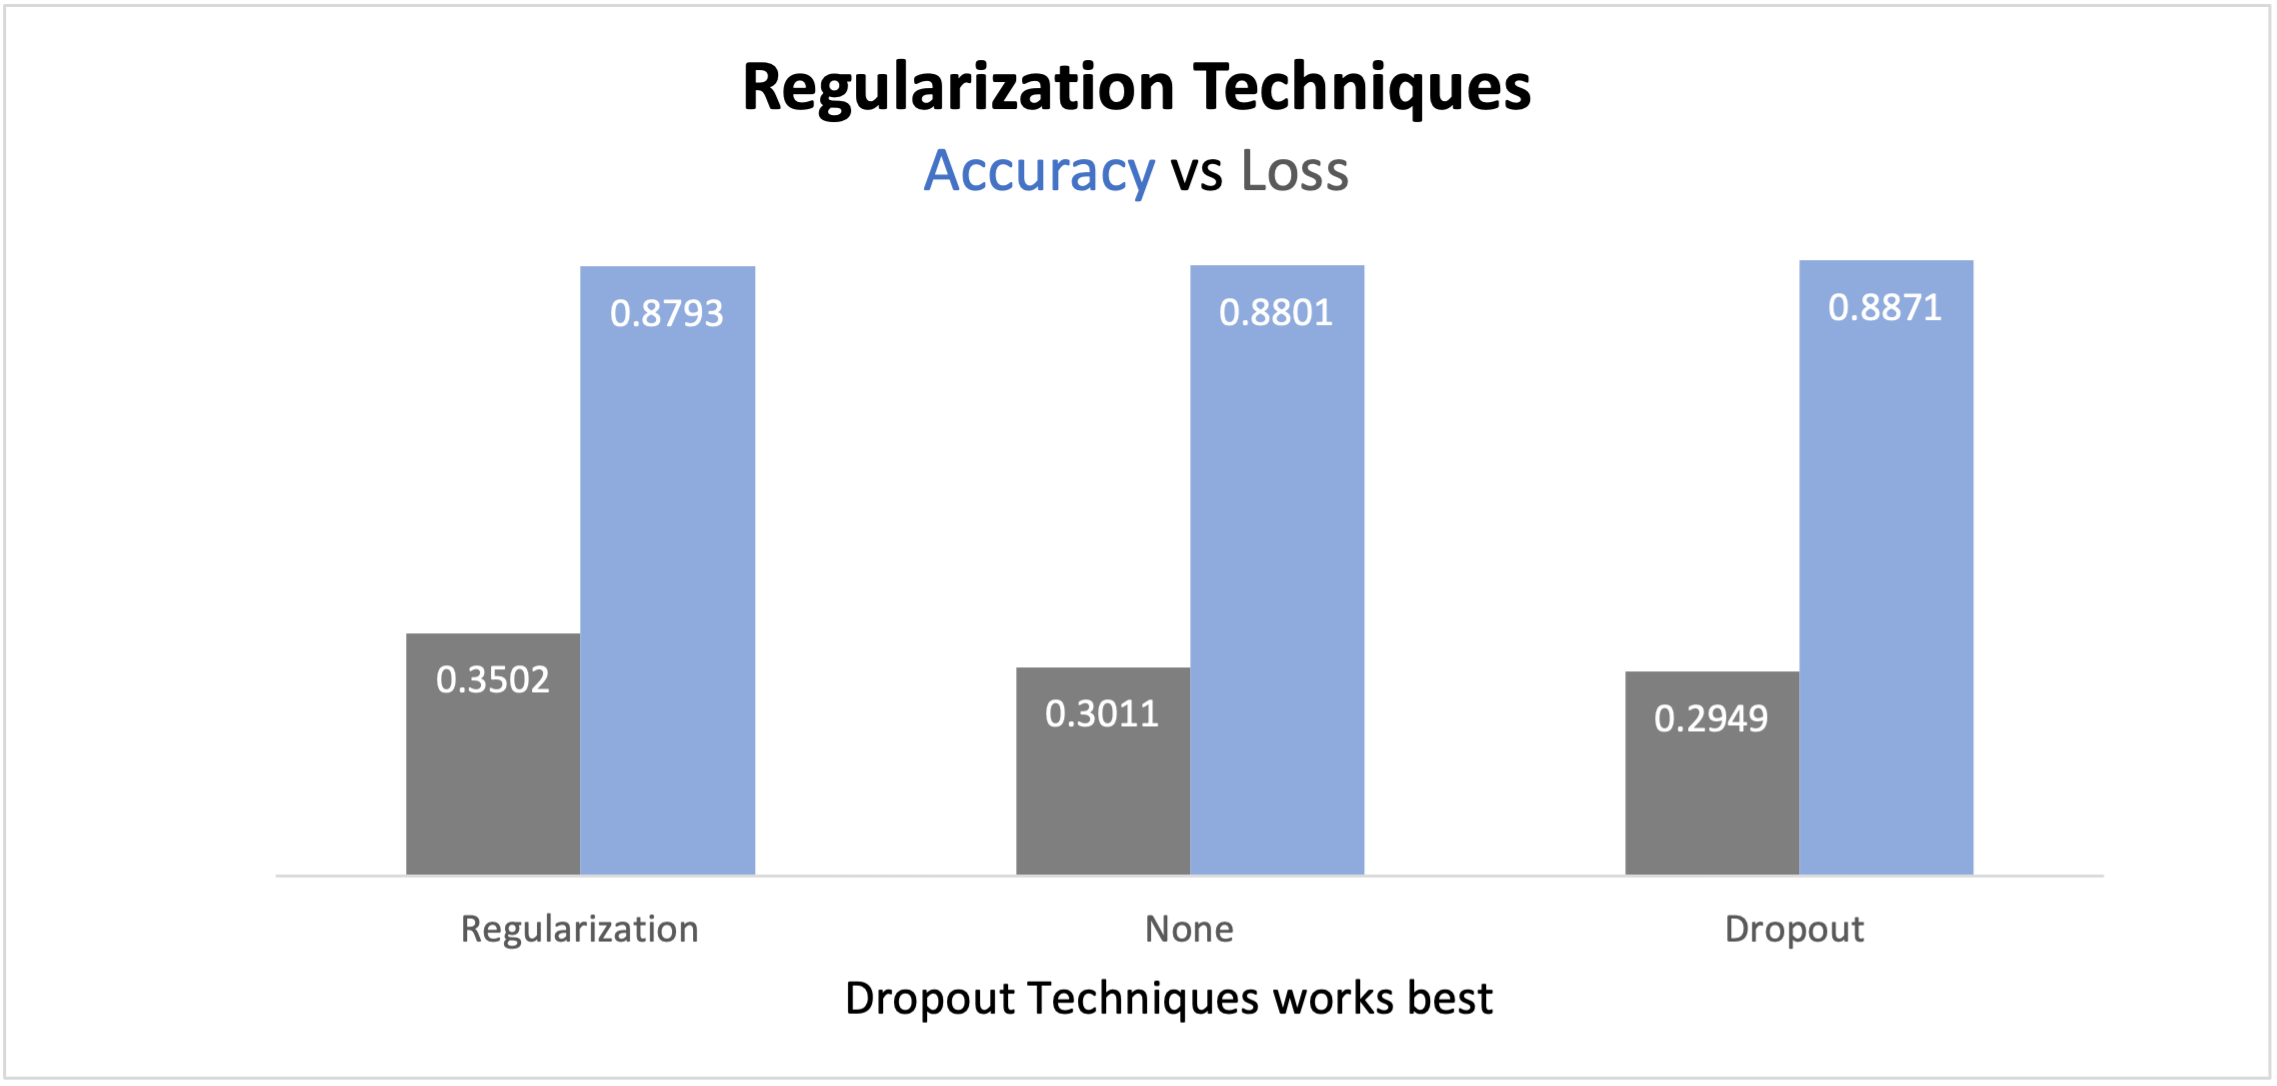

###Summary

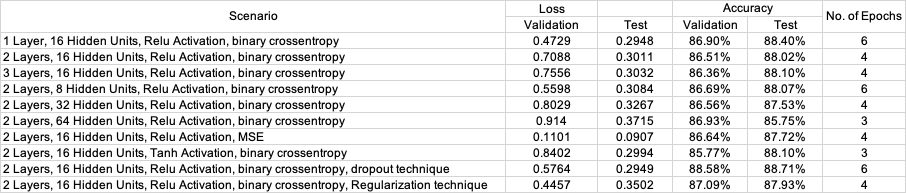

####Let's visualize the Validation and Test dataset Loss values for each approach

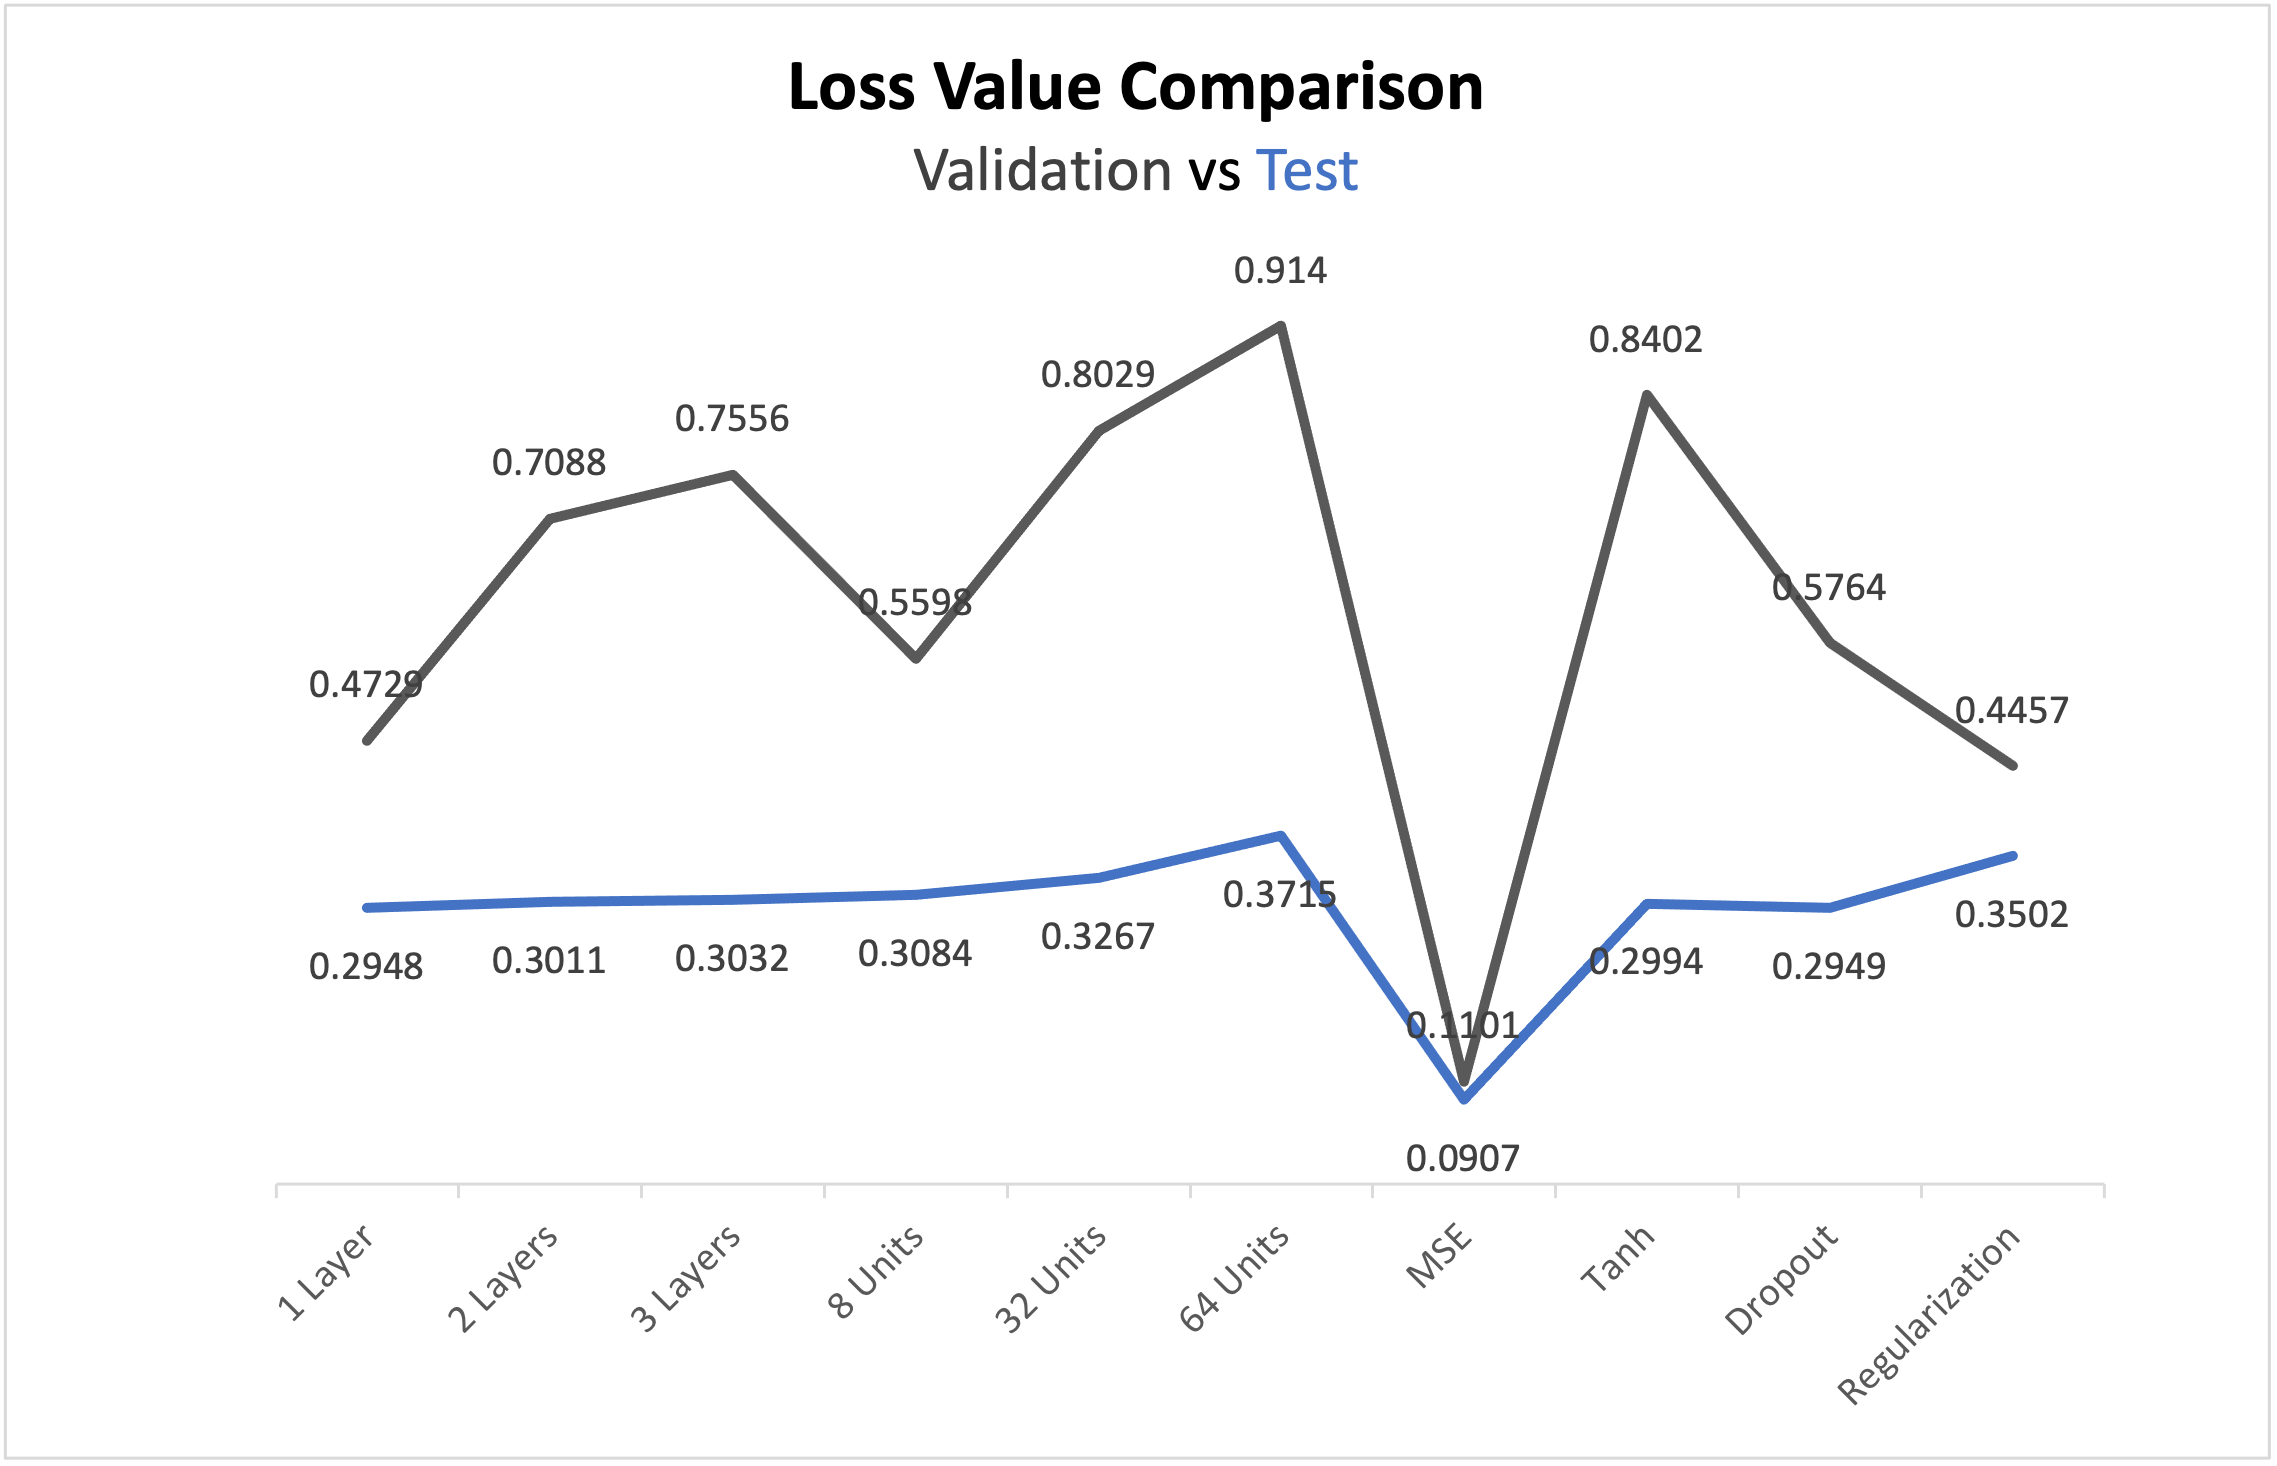

####Let's visualize the Validation and Test dataset Accuracy rate for each approach

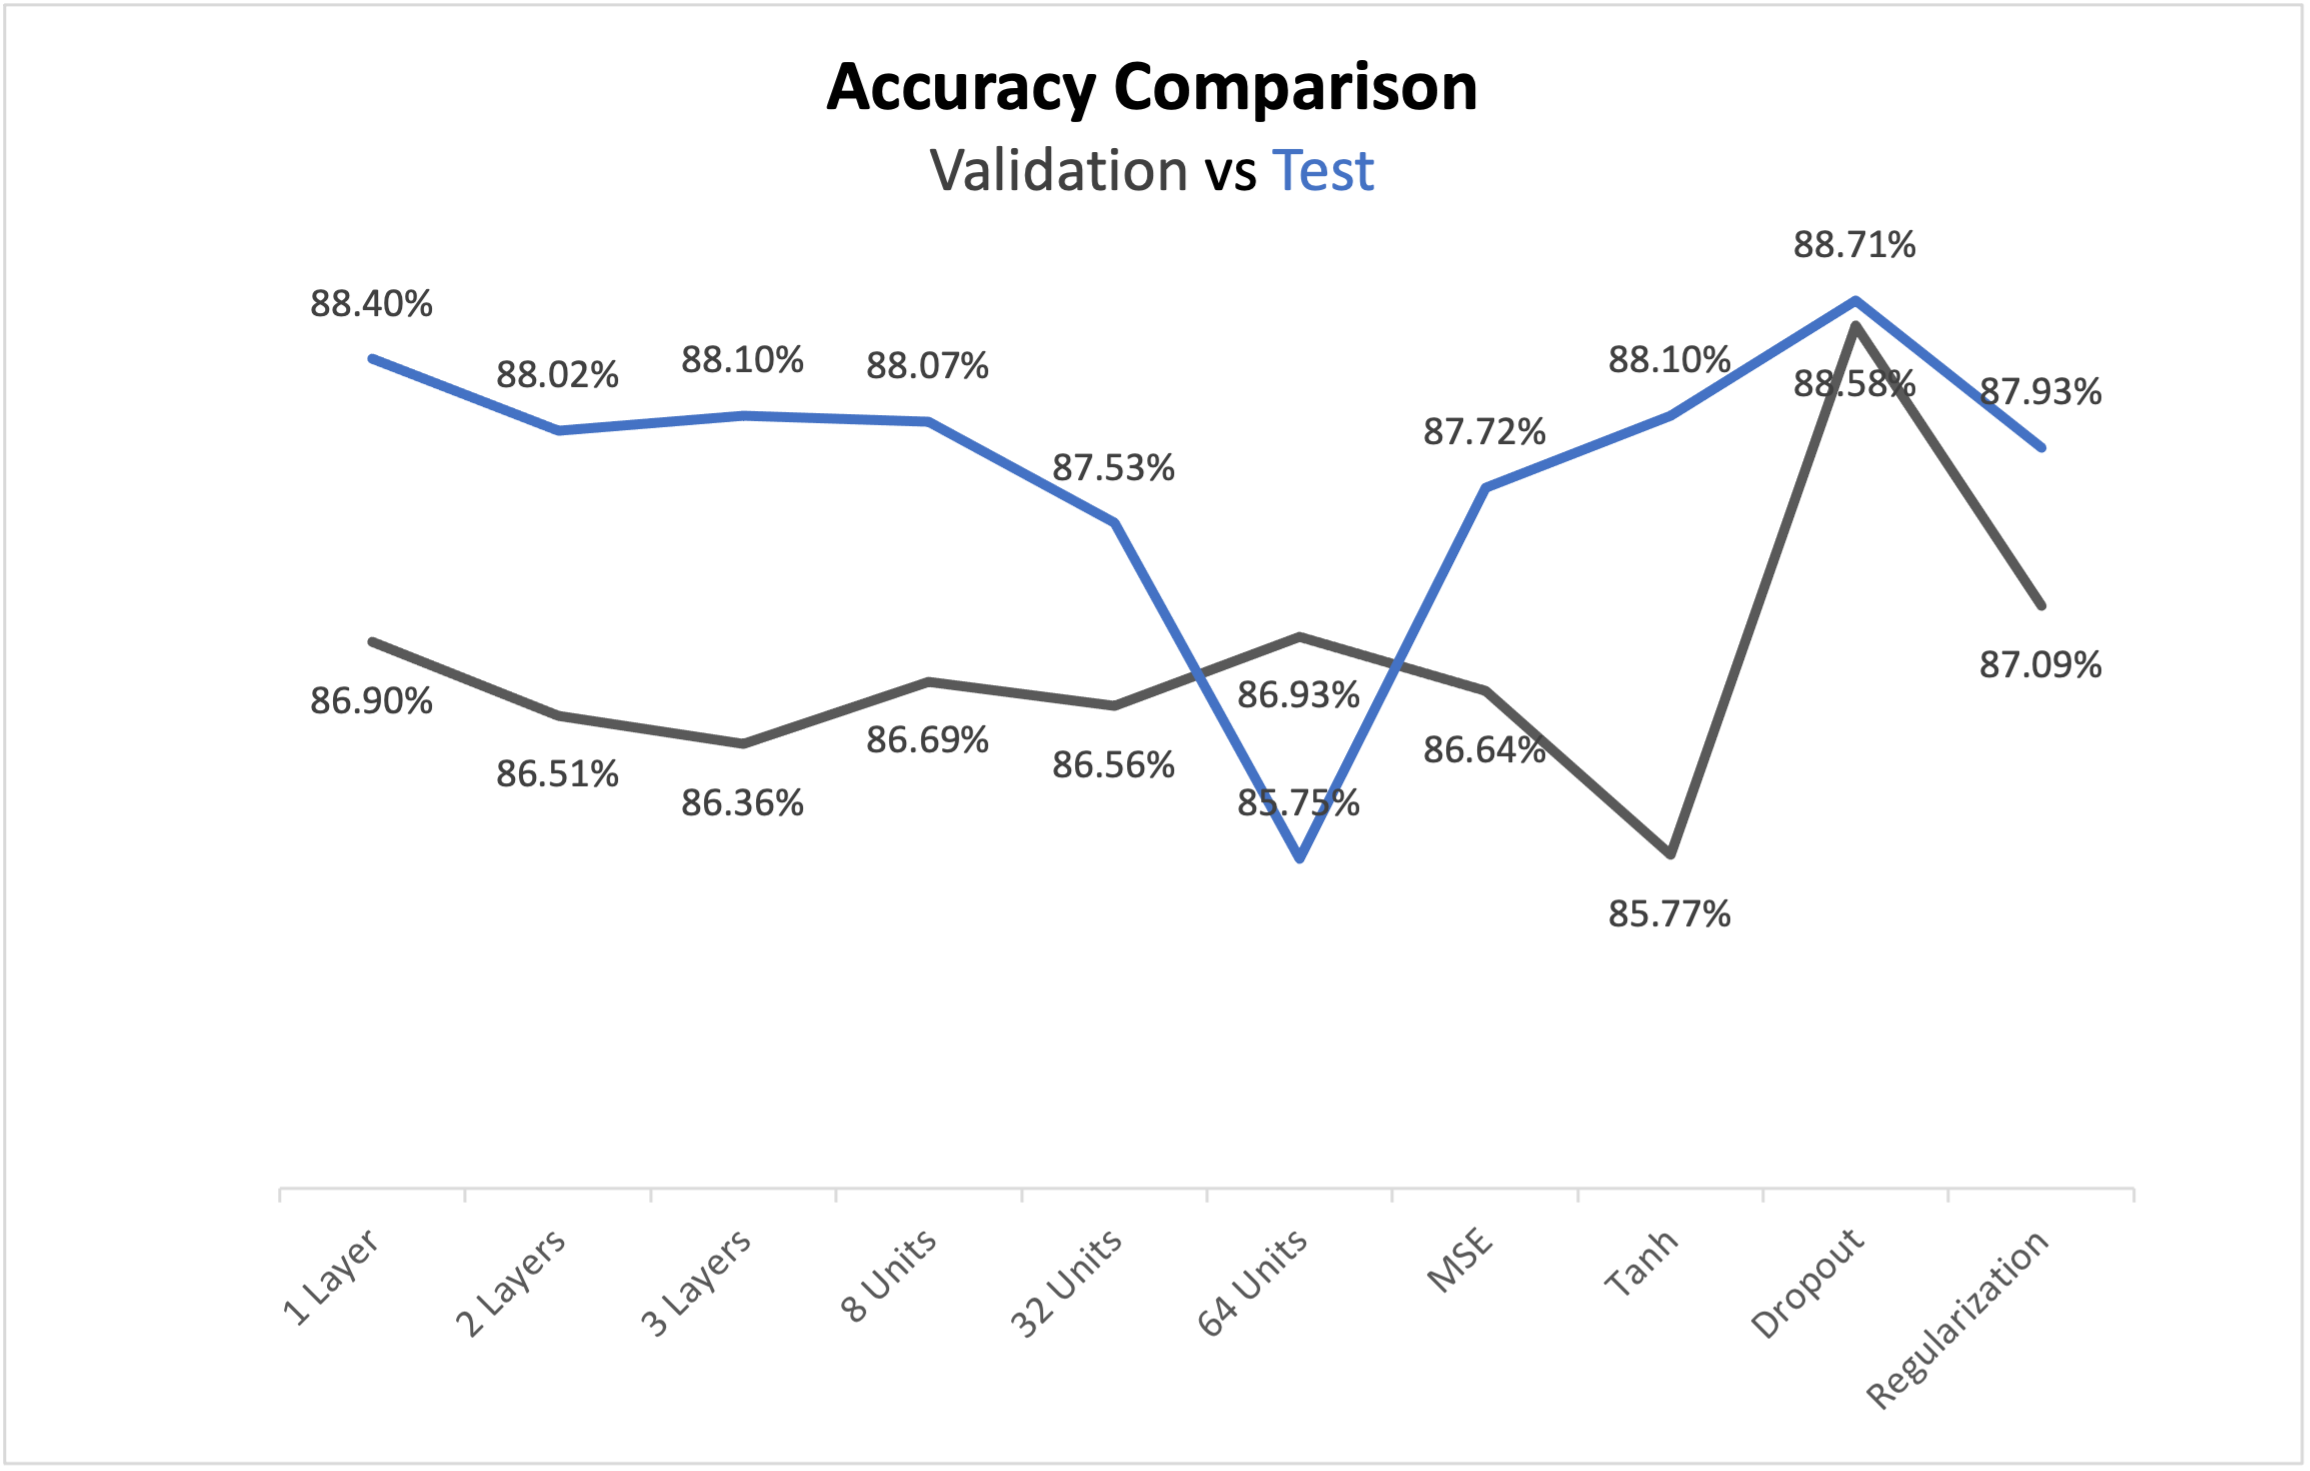

### Conclusions

* In comparison to two and three dense layers, one dense layer performs best.
* A smaller number of units is more appropriate.
* The loss function binary crossentropy performs better than the mse loss function.
* When we utilize the relu or tanh functions, there is a minor difference in accuracy.
* The precision of dropout with a 0.5 rate is higher.
* On both the test and validation datasets, the model with 2 Dense Layers, 16 Hidden Units, Relu Activation, Binary crossentropy loss function, and dopout (0.5) approach has the maximum accuracy.
* On the test dataset, the model with 2 dense layers, 64 hidden units, Relu Activation, and Binary crossentropy loss function has the lowest accuracy.
*	On the validation dataset, the model with 2 Dense Layers, 16 Hidden Units, Tanh Activation, and Binary crossentropy loss function has the lowest accuracy.
